<a href="https://colab.research.google.com/github/amitsangani/Llama/blob/main/Llama_3_2_Multimodal%2C_Stack%2C_Tool_Calling_and_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
On-device, Multimodal and Llama Stack are the 3 major announcements in [Llama 3.2](https://www.llama.com/). In this workstop, we'll cover multimodal Llama 3.2, Llama Stack, as well as Tool calling and RAG.

# Multimodal Llama 3.2

This section shows 6 multimodal use cases that can be evolved into full production apps.

First we define a helper function llama32 which accepts a list of messages and the model size, default to the 3.2 11B but can also use 90B if passed as 90.

In [1]:
import requests
import json

from google.colab import userdata
import os
os.environ['TOGETHER_API_KEY'] = userdata.get('TOGETHER_API_KEY')

def llama32(messages, model_size=11):
  model = f"meta-llama/Llama-3.2-{model_size}B-Vision-Instruct-Turbo"
  url = "https://api.together.xyz/v1/chat/completions"
  payload = {
    "model": model,
    "max_tokens": 4096,
    "temperature": 0.0,
    "stop": ["<|eot_id|>","<|eom_id|>"],
    "messages": messages
  }

  headers = {
    "Accept": "application/json",
    "Content-Type": "application/json",
    "Authorization": "Bearer " + os.environ["TOGETHER_API_KEY"]
  }
  res = json.loads(requests.request("POST", url, headers=headers, data=json.dumps(payload)).content)

  if 'error' in res:
    raise Exception(res['error'])

  return res['choices'][0]['message']['content']

Next are two helpers that display a local image and remote image.

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

def display_local_image(path):
  img = Image.open(path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

def display_image_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Finally, another helper llama32pi that accepts a raw prompt and an image url.

In [3]:
def llama32pi(prompt, image_url, model_size=90):
  display_image_url(image_url)
  messages = [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": prompt
        },
        {
          "type": "image_url",
          "image_url": {
            "url": image_url
          }
        }
      ]
    },
  ]

  result = llama32(messages, model_size)
  return result


## Image captioning

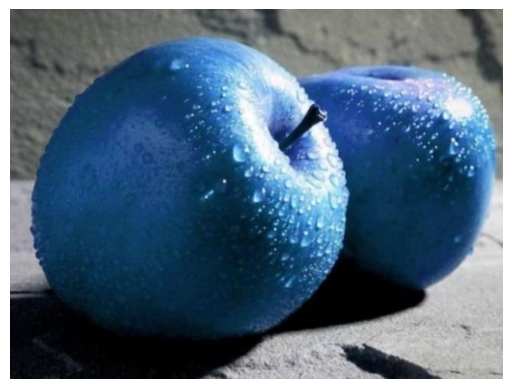

The image depicts two blue apples with water droplets on them, placed on a gray surface.


In [4]:
# print(llama32pi("describe the image in one sentence", "https://raw.githubusercontent.com/meta-llama/llama-models/refs/heads/main/Llama_Repo.jpeg"))
print(llama32pi("describe the image in one sentence", "https://images.news18.com/ibnlive/uploads/2023/11/untitled-design-9-2023-11-95acc557353b153d9fd9e074fc345786.png?impolicy=website&width=640&height=480"))


## OCR on nutrition facts

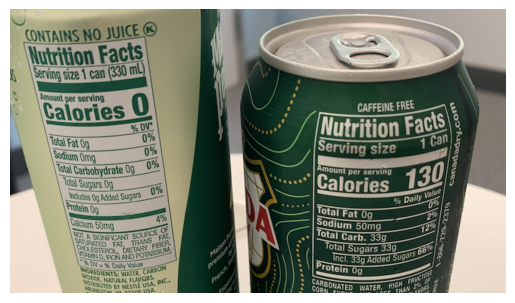

Based on the image, it appears that one drink is a caffeinated soda and the other is a non-caffeinated soda. The caffeinated soda has 130 calories per serving, while the non-caffeinated soda has 0 calories per serving.

If you're looking for a low-calorie option, the non-caffeinated soda would be the better choice. However, if you need a caffeine boost, the caffeinated soda might be a better option.

Here are the nutrition facts for both drinks in JSON format:

**Caffeinated Soda:**

```
{
  "name": "Caffeinated Soda",
  "serving_size": "1 can (330 mL)",
  "calories": 130,
  "total_fat": 0g,
  "sodium": 50mg,
  "total_carbohydrate": 33g,
  "total_sugars": 33g,
  "protein": 0g,
  "caffeine": "yes"
}
```

**Non-Caffeinated Soda:**

```
{
  "name": "Non-Caffeinated Soda",
  "serving_size": "1 can (330 mL)",
  "calories": 0,
  "total_fat": 0g,
  "sodium": 0mg,
  "total_carbohydrate": 0g,
  "total_sugars": 0g,
  "protein": 0g,
  "caffeine": "no"
}
```

Note: The exact values may vary depend

In [6]:
print(llama32pi("Which drink should one drink? After the answer, also generete nurtrition facts of the two drinks in JSON format for easy comparison.",
                "https://raw.githubusercontent.com/jeffxtang/llama-stack-apps/refs/heads/main/examples/drinks.png"))

## Understanding and implementing diagram in Llama 3 paper

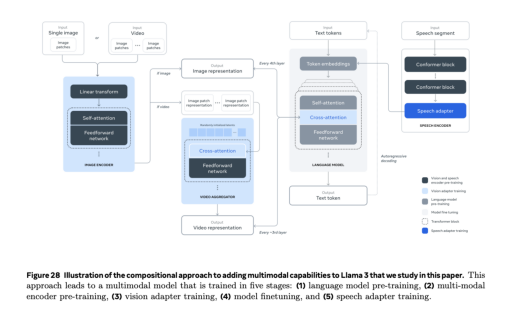

The diagram illustrates the process of adding multimodal capabilities to Llama 3, a large language model. The flow can be summarized as follows:

1. **Input**: The input is a single image or video, which is then processed through various stages.
2. **Image Encoder**: The image is passed through an image encoder, which extracts features from the image.
3. **Video Aggregator**: If the input is a video, it is aggregated into a single frame using a video aggregator.
4. **Cross-Attention**: The output of the image encoder and video aggregator is fed into a cross-attention mechanism, which attends to different parts of the input.
5. **Language Model**: The output of the cross-attention mechanism is then passed through a language model, which generates text based on the input.
6. **Text Tokens**: The output of the language model is tokenized into individual words or tokens.
7. **Speech Segment**: The text tokens are then passed through a speech segment, which generates speech from the text.
8

In [7]:
print(llama32pi("I see this diagram in the Llama 3 paper. Summarize the flow in text and then return a python script that implements the flow.",
                "https://raw.githubusercontent.com/jeffxtang/llama-stack-apps/refs/heads/main/examples/llama32mm.png"))

## Dog breed recognition

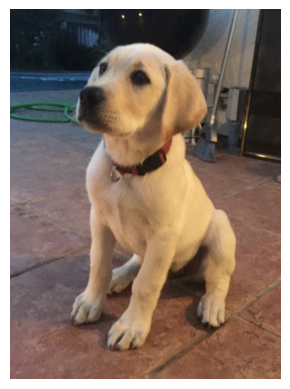

The dog breed depicted in the image is a Labrador Retriever. 

Labradors are known for their friendly, outgoing personalities and high intelligence, making them popular as both family pets and working dogs in roles such as guide dogs, search and rescue, and therapy dogs.


In [8]:
print(llama32pi("What dog breed is this? Tell me in one sentence about the breed.",
                "https://raw.githubusercontent.com/jeffxtang/llama-stack-apps/refs/heads/main/examples/ww2.png"))


## Kid's math grader

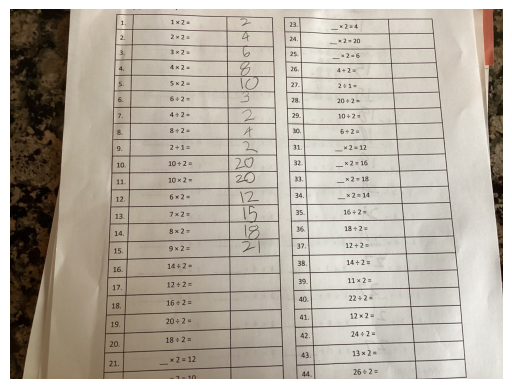

**Step 1: Calculate the Correct Answer for Each Problem**

| Problem | Correct Answer |
| --- | --- |
| 1. 1 x 2 = | 2 |
| 2. 2 x 2 = | 4 |
| 3. 3 x 2 = | 6 |
| 4. 4 x 2 = | 8 |
| 5. 5 x 2 = | 10 |
| 6. 6 ÷ 2 = | 3 |
| 7. 4 ÷ 2 = | 2 |
| 8. 8 ÷ 2 = | 4 |
| 9. 2 ÷ 1 = | 2 |
| 10. 10 ÷ 2 = | 5 |
| 11. 10 x 2 = | 20 |
| 12. 6 x 2 = | 12 |
| 13. 7 x 2 = | 14 |
| 14. 8 x 2 = | 16 |
| 15. 9 x 2 = | 18 |
| 16. 14 ÷ 2 = | 7 |
| 17. 12 ÷ 2 = | 6 |
| 18. 16 ÷ 2 = | 8 |
| 19. 20 ÷ 2 = | 10 |
| 20. 18 ÷ 2 = | 9 |
| 21. _ x 2 = 12 | 6 |
| 22. _ x 2 = 4 | 2 |
| 23. _ x 2 = 20 | 10 |
| 24. _ x 2 = 6 | 3 |
| 25. _ x 2 = 4 | 2 |
| 26. _ x 2 = 2 | 1 |
| 27. _ x 2 = 1 | 0.5 |
| 28. _ x 2 = 20 | 10 |
| 29. _ x 2 = 10 | 5 |
| 30. _ x 2 = 6 | 3 |
| 31. _ x 2 = 12 | 6 |
| 32. _ x 2 = 16 | 8 |
| 33. _ x 2 = 18 | 9 |
| 34. _ x 2 = 14 | 7 |
| 35. _ x 2 = 16 | 8 |
| 36. _ x 2 = 18 | 9 |
| 37. _ x 2 = 12 | 6 |
| 38. _ x 2 = 14 | 7 |
| 39. _ x 2 = 11 | 5.5 |
| 40. _ x 2 = 22 | 11 |
| 41. _ x 2 = 12 | 6 |
| 42. _ x

In [10]:
prompt = """
Check carefully each answer in a kid's math homework.
First calculate the correct answer for each problem.
Then return the the kid's answers.
Finally return a total grade."""

print(llama32pi(prompt, f"https://raw.githubusercontent.com/jeffxtang/llama-stack-apps/refs/heads/main/examples/math_hw1.jpg"))

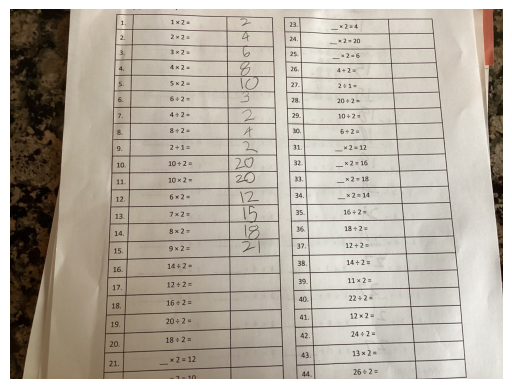

**Step 1: Return the kid's answers for all the math problems in the question below.**

*   1. 2
*   2. 4
*   3. 6
*   4. 8
*   5. 10
*   6. 3
*   7. 2
*   8. 4
*   9. 2
*   10. 20
*   11. 20
*   12. 12
*   13. 15
*   14. 18
*   15. 21
*   16. 
*   17. 
*   18. 
*   19. 
*   20. 
*   21. 
*   22. 
*   23. 
*   24. 
*   25. 
*   26. 
*   27. 
*   28. 
*   29. 
*   30. 
*   31. 
*   32. 
*   33. 
*   34. 
*   35. 
*   36. 
*   37. 
*   38. 
*   39. 
*   40. 
*   41. 
*   42. 
*   43. 
*   44. 

**Step 2: Calculate the correct answer for each problem.**

*   1. 1 x 2 = 2
*   2. 2 x 2 = 4
*   3. 3 x 2 = 6
*   4. 4 x 2 = 8
*   5. 5 x 2 = 10
*   6. 6 ÷ 2 = 3
*   7. 4 ÷ 2 = 2
*   8. 8 ÷ 2 = 4
*   9. 2 ÷ 1 = 2
*   10. 10 ÷ 2 = 5
*   11. 10 x 2 = 20
*   12. 6 x 2 = 12
*   13. 7 x 2 = 14
*   14. 8 x 2 = 16
*   15. 9 x 2 = 18
*   16. 14 ÷ 2 = 7
*   17. 12 ÷ 2 = 6
*   18. 16 ÷ 2 = 8
*   19. 20 ÷ 2 = 10
*   20. 18 ÷ 2 = 9
*   21. _ x 2 = 12
*   22. _ x 2 = 4
*   23. _ x 2 = 20
*   24. _ x 2 = 6
*   

In [11]:
prompt = """
Return the kid's answers for all the math problems in the question below.
Then calculate the correct answer for each problem.
Finally compare kid's answers with the correct answers, and return the grade.
"""

print(llama32pi(prompt, f"https://raw.githubusercontent.com/jeffxtang/llama-stack-apps/refs/heads/main/examples/math_hw1.jpg"))

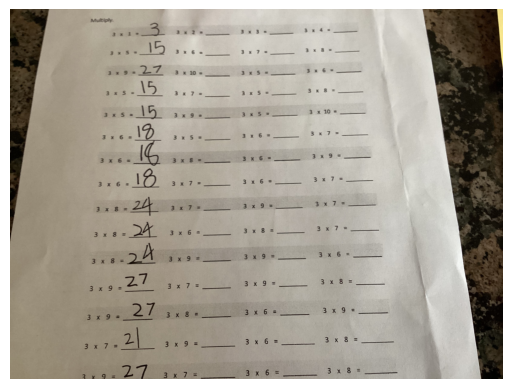

**Step 1: Calculate the correct answer for each problem**

*   3 x 1 = 3
*   3 x 5 = 15
*   3 x 9 = 27
*   3 x 5 = 15
*   3 x 5 = 15
*   3 x 6 = 18
*   3 x 6 = 18
*   3 x 6 = 18
*   3 x 8 = 24
*   3 x 8 = 24
*   3 x 9 = 27
*   3 x 9 = 27
*   3 x 7 = 21
*   3 x 9 = 27

**Step 2: Compare the calculated answers with the kid's answers and mark them as correct or incorrect**

*   3 x 1 = 3 (Correct)
*   3 x 5 = 15 (Correct)
*   3 x 9 = 27 (Correct)
*   3 x 5 = 15 (Correct)
*   3 x 5 = 15 (Correct)
*   3 x 6 = 18 (Correct)
*   3 x 6 = 18 (Correct)
*   3 x 6 = 18 (Correct)
*   3 x 8 = 24 (Correct)
*   3 x 8 = 24 (Correct)
*   3 x 9 = 27 (Correct)
*   3 x 9 = 27 (Correct)
*   3 x 7 = 21 (Correct)
*   3 x 9 = 27 (Correct)

**Step 3: Calculate the total score**

Total score = Number of correct answers / Total number of problems

Total score = 14 / 14

Total score = 1

The kid scored 100% on their math homework.


In [12]:
prompt = """
Check carefully each answer in a kid's math homework, first do the calculation, then compare the result with the kid's answer,
mark correct or incorrect for each answer, and finally return a total score based on all the problems answered."""

print(llama32pi(prompt, f"https://raw.githubusercontent.com/jeffxtang/llama-stack-apps/refs/heads/main/examples/math_hw2.jpg"))

## Books on the shelf

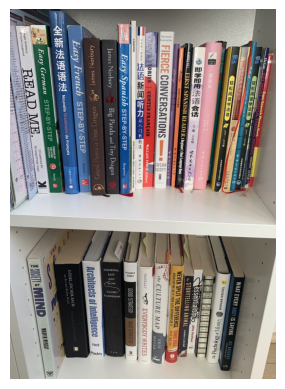

The book titles with author names on the top shelf, from left to right, are:

* READ ME. by Roger Borberry & Dylan Langwood
* Easy German STEP-BY-STEP by Roger Borberry & Dylan Langwood
* Nouvelle Grammaire du Francais by Roger Borberry & Dylan Langwood
* STEP-BY-STEP by Roger Borberry & Dylan Langwood
* Easy French STEP-BY-STEP by Roger Borberry & Dylan Langwood
* Big Panda and Tiny Dragon by James Norbury
* Easy Spanish STEP-BY-STEP by James Norbury
* FIERCE CONVERSATIONS by Susan Scott
* FIRST SPANISH READER by Wallace Fowlie

The book titles with author names on the bottom shelf, from left to right, are:

* THE SOCIETY OF MIND by Marvin Minsky
* Architects of Intelligence by Martin Ford
* THINKING, FAST AND SLOW by Daniel Kahneman
* GOOD STRATEGY BAD STRATEGY by Richard P. Rumelt
* EVERYBODY WRITES by Erin Handley
* the CULTURE MAP by Erin Meyer
* NEVER SPLIT THE DIFFERENCE by Chris Voss
* STORYTELLING ANIMAL by Jonathan Gottschall
* essentialism by Greg McKeown
* WHAT EVERY BODY I

In [13]:
prompt = """
Return all the book titles with author names in the bookshelf, first the top shelf from left to right, then the bottom shelf the same order."""

print(llama32pi(prompt, f"https://raw.githubusercontent.com/jeffxtang/llama-stack-apps/refs/heads/main/examples/bookshelf2.png"))

## Money in the recipts

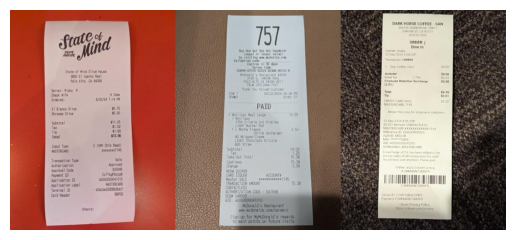

To find the total charge of all the receipts, we need to add up the amounts on each receipt.

**Receipt 1: State of Mind Slice House**

* Subtotal: $11.25
* Tax: $1.02
* Tip: $1.69
* Total: $13.96

**Receipt 2: McDonald's**

* Subtotal: $14.09
* Tax: $1.29
* Total: $15.38

**Receipt 3: Dark Horse Coffee**

* Subtotal: $4.00
* Tax: $0.08
* Total: $4.08

Now, let's add up the totals:

$13.96 + $15.38 + $4.08 = **$33.42**

Therefore, the total charge of all the receipts is $33.42.


In [14]:
prompt = "What's the total charge of all the recipts below?"

response = llama32pi(prompt, f"https://raw.githubusercontent.com/jeffxtang/llama-stack-apps/refs/heads/main/examples/receipts.jpg")
print(response)

# Llama Stack Demo

The quickest way to jump start with Llama Stack.

In [15]:
!pip install -q llama-stack-client==0.0.35

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00


## Llama Stack Inference

In [16]:
LLAMA_STACK_API_TOGETHER_URL="https://llama-stack.together.ai"
LLAMA31_8B_INSTRUCT = "Llama3.1-8B-Instruct"

from llama_stack_client import LlamaStackClient
from llama_stack_client.lib.inference.event_logger import EventLogger
from llama_stack_client.types import UserMessage

async def run_main():
    client = LlamaStackClient(
        base_url=LLAMA_STACK_API_TOGETHER_URL,
    )

    iterator = client.inference.chat_completion(
        messages=[
            UserMessage(
                content="Who wrote the book Godfather?",
                role="user",
            ),

            UserMessage(
                content="Best 5 quotes in the book.",
                role="user",
            ),
        ],
        model=LLAMA31_8B_INSTRUCT,
        stream=True
    )

    async for log in EventLogger().log(iterator):
        log.print()

await run_main()

Assistant> The book "The Godfather" was written by Mario Puzo. Here are 5 famous quotes from the book:

1. **"Keep your friends close, but your enemies closer."** - This quote has become iconic and is often associated with the novel, although it is actually a phrase used by the character Don Vito Corleone in a slightly different form in the film adaptation.
2. **"Leave the gun. Take the cannoli."** - This is a famous line spoken by a character named Peter Clemenza in the book, and has become a cultural reference.
3. **"I'm gonna make him an offer he can't refuse."** - This phrase is also a line spoken by Don Vito Corleone, and has become synonymous with the idea of a power dynamic where one person has the upper hand.
4. **"Every time that Fay had a headache, I give her Excedrin."** - While not as popular as some of the other quotes, this line is used to describe the respect and devotion of a loyal member of the Corleone family towards his wife, and shows the rise of the phrase to Ameri

## Llama Stack Agent


In [17]:
import asyncio
from typing import List, Optional, Dict

from llama_stack_client import LlamaStackClient
from llama_stack_client.lib.agents.event_logger import EventLogger

from llama_stack_client.types import SamplingParams, UserMessage
from llama_stack_client.types.agent_create_params import AgentConfig

class Agent:
    def __init__(self):
        self.client = LlamaStackClient(
            base_url=LLAMA_STACK_API_TOGETHER_URL,
        )

    def create_agent(self, agent_config: AgentConfig):
        agent = self.client.agents.create(
            agent_config=agent_config,
        )
        self.agent_id = agent.agent_id
        session = self.client.agents.sessions.create(
            agent_id=agent.agent_id,
            session_name="example_session",
        )
        self.session_id = session.session_id

    async def execute_turn(self, content: str):
        response = self.client.agents.turns.create(
            agent_id=self.agent_id,
            session_id=self.session_id,
            messages=[
                UserMessage(content=content, role="user"),
            ],
            stream=True,
        )

        for chunk in response:
            if chunk.event.payload.event_type != "turn_complete":
                yield chunk

async def run_main():
    agent_config = AgentConfig(
        model=LLAMA31_8B_INSTRUCT,
        instructions="",
        enable_session_persistence=False,
    )

    agent = Agent()
    agent.create_agent(agent_config)

    prompts = [
        "Who wrote the book Godfather?",
        "Best 5 quotes in the book.",
    ]

    for prompt in prompts:
        print(f"User> {prompt}")
        response = agent.execute_turn(content=prompt)
        async for log in EventLogger().log(response):
            if log is not None:
                log.print()

await run_main()

User> Who wrote the book Godfather?
inference> The book "The Godfather" is written by Mario Puzo.
User> Best 5 quotes in the book.
inference> Here are five famous quotes from the book "The Godfather" by Mario Puzo:

1. **"Keep your friends close, but your enemies closer."** - This quote is a variation of a line from a Sicilian proverb: "Il nemico è tuo e noioso." In the book, it is said by Don Vito Corleone's consigliere, Tom Hagen.

2. **"I'm gonna make him an offer he can't refuse."** - This quote is said by Don Vito Corleone in the book, meaning he will offer a deal that is too good for the person to refuse.

3. **"Leave the gun. Take the cannoli."** - This quote is given to a character, Luca Brasi, by Don Vito Corleone's brother, Sonny Corleone. It tells the hitman to leave his gun behind after carrying out his assigned task, implying that he should take the cannoli as a token or compensation.

4. **"Revenge is a dish that tastes best when it is cold."** - This quote is a Sicilian 

## Llama Stack Multimodel 3.2

In [18]:
import base64

def encode_image(image_path):
  with open(image_path, "rb") as img:
    return base64.b64encode(img.read()).decode('utf-8')

In [19]:
from llama_stack_client import LlamaStackClient
from llama_stack_client.types import agent_create_params

LLAMA32_11B_INSTRUCT = "Llama3.2-11B-Vision-Instruct"


class Agent:
    def __init__(self):
        self.client = LlamaStackClient(
            base_url=LLAMA_STACK_API_TOGETHER_URL,
        )

    def create_agent(self, agent_config: AgentConfig):
        agent = self.client.agents.create(
            agent_config=agent_config,
        )
        self.agent_id = agent.agent_id
        session = self.client.agents.sessions.create(
            agent_id=agent.agent_id,
            session_name="example_session",
        )
        self.session_id = session.session_id

    async def execute_turn(self, prompt: str, image_path: str):
        base64_image = encode_image(image_path)

        messages = [{
            "role": "user",
            "content": [
              {
                "image": {
                  "uri": f"data:image/jpeg;base64,{base64_image}"
                }
              },
              prompt,
            ]
        }]

        response = self.client.agents.turns.create(
            agent_id=self.agent_id,
            session_id=self.session_id,
            messages = messages,
            stream=True,
        )

        for chunk in response:
            if chunk.event.payload.event_type != "turn_complete":
                yield chunk

async def run_main(image_path, prompt):
    agent_config = AgentConfig(
        model=LLAMA32_11B_INSTRUCT,
        instructions="You are a helpful assistant",
        enable_session_persistence=False,
    )

    agent = Agent()
    agent.create_agent(agent_config)

    print(f"User> {prompt}")
    response = agent.execute_turn(prompt=prompt, image_path=image_path)
    async for log in EventLogger().log(response):
        if log is not None:
            log.print()

In [20]:
!wget https://raw.githubusercontent.com/meta-llama/llama-models/refs/heads/main/Llama_Repo.jpeg

--2024-10-21 06:02:28--  https://raw.githubusercontent.com/meta-llama/llama-models/refs/heads/main/Llama_Repo.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 282183 (276K) [image/jpeg]
Saving to: ‘Llama_Repo.jpeg’

Llama_Repo.jpeg     100%[===================>] 275.57K  --.-KB/s    in 0.1s    

2024-10-21 06:02:28 (2.04 MB/s) - ‘Llama_Repo.jpeg’ saved [282183/282183]



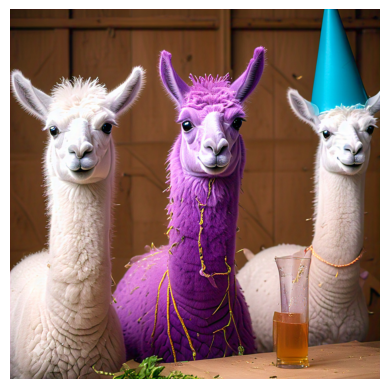

In [21]:
display_local_image("/content/Llama_Repo.jpeg")

In [22]:
await run_main("/content/Llama_Repo.jpeg",
         "How many difference colors those llamas are? What're those colors?")

User> How many difference colors those llamas are? What're those colors?
inference> There are three llamas in the image. From left to right, the colors of the llamas are white, purple, and white. The llama on the left is white, the llama in the middle is purple, and the llama on the right is white.


In [28]:
!wget https://aldf.org/wp-content/uploads/2018/05/lamb-iStock-665494268-16x9-e1559777676675.jpg

--2024-10-21 06:09:16--  https://aldf.org/wp-content/uploads/2018/05/lamb-iStock-665494268-16x9-e1559777676675.jpg
Resolving aldf.org (aldf.org)... 192.124.249.183
Connecting to aldf.org (aldf.org)|192.124.249.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155669 (152K) [image/jpeg]
Saving to: ‘lamb-iStock-665494268-16x9-e1559777676675.jpg’

lamb-iStock-6654942 100%[===================>] 152.02K   349KB/s    in 0.4s    

2024-10-21 06:09:18 (349 KB/s) - ‘lamb-iStock-665494268-16x9-e1559777676675.jpg’ saved [155669/155669]



In [30]:
await run_main("/content/lamb-iStock-665494268-16x9-e1559777676675.jpg",
         "How many kittens are there in the picture? What is their facial expression showing?")

User> How many kittens are there in the picture? What is their facial expression showing?
inference> I don't see any kittens in the image, I see a lamb. The lamb's facial expression appears to be neutral, as it is looking directly at the camera with its ears perked up and no visible signs of fear, aggression, or excitement.


# Tool calling in Llama 3.2

Llama 3.2 (and 3.1) supports three built-in tools:

1. Brave Web Search: Tool call to perform web searches.
2. Wolfram Alpha: Tool call to perform complex mathematical calculations.
3. Code Interpreter: Enables the model to output python code.

## The brave_search built-in tool

Web search tool is needed when the answer to the user question is beyond the LLM's konwledge cutoff date, e.g. current whether info or recent events. Llama 3.2 has a konwledge cutoff date of December 2023.

To see how Llama 3.2 responds to a user question "What is the current weather in Menlo Park, California?" with the system prompt above, run the code snippet:

In [31]:
from datetime import datetime

current_date = datetime.now()
formatted_date = current_date.strftime("%d %B %Y")

messages = [
    {
      "role": "system",
      "content":  f"""
Environment: ipython
Tools: brave_search, wolfram_alpha
Cutting Knowledge Date: December 2023
Today Date: {formatted_date}
"""
      },
    {
      "role": "user",
      "content": "What is the current weather in Menlo Park, California?"
    }
  ]

response = llama32(messages)
print(response)

<|python_tag|>brave_search.call(query="current weather in Menlo Park, California")


### Calling the search API

To ask Llama 3.2 for the final answer to your original question, you'll need to first make the actual search call and then pass the search result back to Llama 3.2. Even though the Llama 3.2 built in search tool name is `brave_search`, you can use any search API; in fact, because you'll need to enter your credit card info at the Brave Search site even to get a trial API key, we'll use Tavily Search, which you can get a free trial API key in seconds using your gmail or github account.



In [32]:
!pip install -q tavily-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.5 MB/s eta 0:00:00


In [33]:
from tavily import TavilyClient

TAVILY_API_KEY = userdata.get('TAVILY_API_KEY')
tavily_client = TavilyClient(api_key=TAVILY_API_KEY)

result = tavily_client.search("current weather in Menlo Park, California")
result

{'query': 'current weather in Menlo Park, California',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Weather in Menlo Park, California',
   'url': 'https://www.weatherapi.com/',
   'content': "{'location': {'name': 'Menlo Park', 'region': 'California', 'country': 'United States of America', 'lat': 37.4539, 'lon': -122.1811, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1729491054, 'localtime': '2024-10-20 23:10'}, 'current': {'last_updated_epoch': 1729490400, 'last_updated': '2024-10-20 23:00', 'temp_c': 17.2, 'temp_f': 63.0, 'is_day': 0, 'condition': {'text': 'Clear', 'icon': '//cdn.weatherapi.com/weather/64x64/night/113.png', 'code': 1000}, 'wind_mph': 2.2, 'wind_kph': 3.6, 'wind_degree': 181, 'wind_dir': 'S', 'pressure_mb': 1019.0, 'pressure_in': 30.1, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 34, 'cloud': 0, 'feelslike_c': 17.2, 'feelslike_f': 63.0, 'windchill_c': 16.5, 'windchill_f': 61.8, 'heatindex_c': 16.5, 'heatindex_f': 61.7,

In [34]:
search_result = result["results"][0]["content"]
search_result

"{'location': {'name': 'Menlo Park', 'region': 'California', 'country': 'United States of America', 'lat': 37.4539, 'lon': -122.1811, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1729491054, 'localtime': '2024-10-20 23:10'}, 'current': {'last_updated_epoch': 1729490400, 'last_updated': '2024-10-20 23:00', 'temp_c': 17.2, 'temp_f': 63.0, 'is_day': 0, 'condition': {'text': 'Clear', 'icon': '//cdn.weatherapi.com/weather/64x64/night/113.png', 'code': 1000}, 'wind_mph': 2.2, 'wind_kph': 3.6, 'wind_degree': 181, 'wind_dir': 'S', 'pressure_mb': 1019.0, 'pressure_in': 30.1, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 34, 'cloud': 0, 'feelslike_c': 17.2, 'feelslike_f': 63.0, 'windchill_c': 16.5, 'windchill_f': 61.8, 'heatindex_c': 16.5, 'heatindex_f': 61.7, 'dewpoint_c': 8.7, 'dewpoint_f': 47.6, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 0.0, 'gust_mph': 3.4, 'gust_kph': 5.4}}"

### Reprompting Llama with search tool response

With the tool call result ready, it's time to reprompt Llama 3.2, with all the info below added after the original prompt.


In [35]:
messages = [
    {
      "role": "system",
      "content":  f"""
Environment: ipython
Tools: brave_search, wolfram_alpha
Cutting Knowledge Date: December 2023
Today Date: {formatted_date}
"""
      },
    {
      "role": "user",
      "content": "What is the current weather in Menlo Park, California?"
    },
    {
      "role": "assistant",
      "content": response
    },
    {
      "role": "ipython",
      "content": search_result
    }
  ]

response = llama32(messages)
print(response)

The current weather in Menlo Park, California is clear with a temperature of 17.2°C (63.0°F) and a wind speed of 2.2 mph (3.6 kph) from the south. The humidity is 34% and the pressure is 1019 mb (30.1 in). There is no precipitation and the visibility is 16 km (9.9 miles). The UV index is 0.0 and the gust speed is 3.4 mph (5.4 kph).


## The Wolfram Alpha tool

Wolfram Alpha is designed to handle certain types of complex and highly specific mathematical problems that might be challenging for LLMs to answer with complete accuracy. Examples of problems that Wolfram Alpha can answer correctly but an LLM might struggle with include:

* Symbolic Computation and Simplification
* High-Precision Arithmetic
* Complex Integrals and Derivatives
* Formal Proofs and Theorems
* Advanced Matrix Operations
* Multi-step Complex Calculations

So if you're building a Llama 3.2 math tutor in one or more of those problem domains, you'll likely need to use the Wolfram Alpha tool. The problem below may not need using the Wolfram Alpha tool by default, but you can hint in the prompt to ask Llama to try using the tool so to a more difficult problem you know how to use the Wolfram tool.

In [36]:
math_problem = "Can you help me solve this equation: x^3 - 2x^2 - x + 2 = 0? try using tool"
messages = [
    {
      "role": "system",
      "content":  f"""
Environment: ipython
Tools: brave_search, wolfram_alpha
Cutting Knowledge Date: December 2023
Today Date: {formatted_date}
"""
      },
    {
      "role": "user",
      "content": math_problem
    }
  ]

response = llama32(messages)
print(response)

<|python_tag|>wolfram_alpha.call(query="solve x^3 - 2x^2 - x + 2 = 0")


### Calling the Wolfram Alpha tool

In [37]:
!pip install -q wolframalpha

In [40]:
WOLFRAM_ALPHA_KEY = userdata.get('WOLFRAM_ALPHA_KEY')

from wolframalpha import Client
import nest_asyncio

nest_asyncio.apply()

def wolfram_alpha(query: str) -> str:
    client = Client(WOLFRAM_ALPHA_KEY)
    result = client.query(query)

    results = []
    for pod in result.pods:
        if pod["@title"] == "Result" or pod["@title"] == "Results":
          for sub in pod.subpods:
            results.append(sub.plaintext)

    return '\n'.join(results)

tool_result = wolfram_alpha("solve x^3 - 2x^2 - x + 2 = 0")
print(tool_result)


x = ± 1
x = 2


### Reprompting Llama with tool result

In [41]:
messages = [
    {
      "role": "system",
      "content":  f"""
Environment: ipython
Tools: brave_search, wolfram_alpha
Cutting Knowledge Date: December 2023
Today Date: {formatted_date}
"""
      },
    {
      "role": "user",
      "content": math_problem
    },
    {
      "role": "assistant",
      "content": response
    },
    {
      "role": "ipython",
      "content": tool_result
    }
  ]

response = llama32(messages)
print(response)

The solutions to the equation x^3 - 2x^2 - x + 2 = 0 are x = -1, x = 1, and x = 2.


## The code interpreter built-in tool

Just including `Environment: ipython` turns on the code interpreter tool so you don't need to specify the tool on the Tools: line. Let's now ask Llama a million dollar question: "How much is the monthly payment, total payment, and total interest paid for a 30 year mortgage of $1M at a fixed rate of 6% with a 20% down payment?" Note that you can replace "Python" in "Generate the code in Python." in the System prompt with another language such as "Java" to see the Java code to answer the question.

In [42]:
prompt = """How much is the monthly payment, total payment,
    and total interest paid for a 30 year mortgage of $1M
    at a fixed rate of 6% with a 20% down payment?
    """


messages = [
    {
      "role": "system",
      "content":  f"""
Environment: ipython
Tools: brave_search, wolfram_alpha
Cutting Knowledge Date: December 2023
Today Date: {formatted_date}

Generate the code in Python.
"""
      },
    {
      "role": "user",
      "content": prompt
    },
  ]

response = llama32(messages)
print(response)


<|python_tag|># Define the variables
loan_amount = 1000000  # $1M
annual_interest_rate = 0.06  # 6%
loan_term_years = 30
down_payment = 0.20  # 20%
monthly_interest_rate = annual_interest_rate / 12

# Calculate the down payment
down_payment_amount = loan_amount * down_payment

# Calculate the loan amount after down payment
loan_amount_after_down_payment = loan_amount - down_payment_amount

# Calculate the monthly payment
monthly_payment = loan_amount_after_down_payment * (monthly_interest_rate * (1 + monthly_interest_rate) ** (loan_term_years * 12)) / ((1 + monthly_interest_rate) ** (loan_term_years * 12) - 1)

# Calculate the total payment
total_payment = monthly_payment * 12 * loan_term_years

# Calculate the total interest paid
total_interest_paid = total_payment - loan_amount_after_down_payment * loan_term_years * 12

print(f"Monthly payment: ${monthly_payment:.2f}")
print(f"Total payment: ${total_payment:.2f}")
print(f"Total interest paid: ${total_interest_paid:.2f}")


In [43]:
loan_amount = 1000000  # $1M
annual_interest_rate = 0.06  # 6%
loan_term_years = 30
down_payment = 0.20  # 20%
monthly_interest_rate = annual_interest_rate / 12

# Calculate the down payment
down_payment_amount = loan_amount * down_payment

# Calculate the loan amount after down payment
loan_amount_after_down_payment = loan_amount - down_payment_amount

# Calculate the number of payments
number_of_payments = loan_term_years * 12

# Calculate the monthly payment
monthly_payment = loan_amount_after_down_payment * (monthly_interest_rate * (1 + monthly_interest_rate) ** number_of_payments) / ((1 + monthly_interest_rate) ** number_of_payments - 1)

# Calculate the total payment
total_payment = monthly_payment * number_of_payments

# Calculate the total interest paid
total_interest_paid = total_payment - loan_amount_after_down_payment

print(f"Monthly payment: ${monthly_payment:.2f}")
print(f"Total payment: ${total_payment:.2f}")
print(f"Total interest paid: ${total_interest_paid:.2f}")

Monthly payment: $4796.40
Total payment: $1726705.51
Total interest paid: $926705.51


### Reprompting Llama with tool result

In [44]:
messages = [
    {
      "role": "system",
      "content":  f"""
Environment: ipython
Tools: brave_search, wolfram_alpha
Cutting Knowledge Date: December 2023
Today Date: {formatted_date}
"""
      },
    {
      "role": "user",
      "content": prompt
    },
    {
      "role": "assistant",
      "content": response
    },
    {
      "role": "ipython",
      "content": """
Monthly payment: $4796.40
Total payment: $1726705.51
Total interest paid: $926705.51
"""
    }
  ]

response = llama32(messages)
print(response)

The monthly payment for a 30-year mortgage of $1M at a fixed rate of 6% with a 20% down payment is $4,796.40. The total payment over the life of the loan is $1,726,705.51, and the total interest paid is $926,705.51.


## JSON based custom tool calling

Llama 3.2's support of custom tools allows you to define your own custom tools, inform Llama of the custom tool descriptions, and expect Llama to return custom tool calls based on the user input.

Assume you have a custom function, which returns the top trending songs for one of the three countries (US, France and Spain), defined as follows:

In [45]:
def trending_songs(country_name, top_number):
  top_number = int(top_number)
  songs = {
        "US": [
            "Blinding Lights - The Weeknd",
            "Levitating - Dua Lipa",
            "Peaches - Justin Bieber",
            "Save Your Tears - The Weeknd",
            "Good 4 U - Olivia Rodrigo",
            "Montero (Call Me By Your Name) - Lil Nas X",
            "Kiss Me More - Doja Cat",
            "Stay - The Kid LAROI, Justin Bieber",
            "Drivers License - Olivia Rodrigo",
            "Butter - BTS"
        ],
        "France": [
            "Dernière danse - Indila",
            "Je te promets - Johnny Hallyday",
            "La Vie en rose - Édith Piaf",
            "Tout oublier - Angèle",
            "Rien de tout ça - Amel Bent",
            "J'ai demandé à la lune - Indochine",
            "Bella - Maître Gims",
            "À nos souvenirs - Tino Rossi",
            "Le Sud - Nino Ferrer",
            "La Nuit je mens - Alain Bashung"
        ],
        "Spain": [
            "Despacito - Luis Fonsi",
            "Bailando - Enrique Iglesias",
            "Con altura - Rosalía, J.Balvin",
            "Súbeme la Radio - Enrique Iglesias",
            "Hawái - Maluma",
            "RITMO (Bad Boys for Life) - Black Eyed Peas, J Balvin",
            "Dákiti - Bad Bunny, Jhay Cortez",
            "Vivir mi vida - Marc Anthony",
            "Una vaina loca - Farruko, Sharlene",
            "Te boté - Nio García, Casper Mágico, Ozuna"
        ]
    }

  # Find the list of songs for the given country
  if country_name in songs:
    return songs[country_name][:top_number]

  # If the country is not found, return an empty list
  return []

# Example usage:
country = "US"
top_num = 5
top_songs = trending_songs(country, top_num)
print(f"Top {top_num} trending songs in {country}:")
print(top_songs)


Top 5 trending songs in US:
['Blinding Lights - The Weeknd', 'Levitating - Dua Lipa', 'Peaches - Justin Bieber', 'Save Your Tears - The Weeknd', 'Good 4 U - Olivia Rodrigo']


A mapping of the function name in string and the function name itself is needed:

In [46]:
custom_tools = {"trending_songs": trending_songs}

### Querying Llama for a custom tool call result

In [47]:
messages = [
    {
      "role": "system",
      "content":  """

Environment: ipython
Cutting Knowledge Date: December 2023
Today Date: 30 August 2024
"""
      },
    {
      "role": "user",
      "content": """
Answer the user's question by making use of the following functions if needed.
If none of the function can be used, please say so.
Here is a list of functions in JSON format:
{
    "type": "function",
    "function": {
        "name": "get_boiling_point",
        "description": "Get the boiling point of a liquid",
        "parameters": {
            "type": "object",
            "properties": [
                {
                    "liquid_name": {
                        "type": "object",
                        "description": "name of the liquid"
                    }
                },
                {
                    "celsius": {
                        "type": "object",
                        "description": "whether to use celsius"
                    }
                }
            ],
            "required": ["liquid_name"]
        }
    }
}
{
    "type": "function",
    "function": {
        "name": "trending_songs",
        "description": "Returns the trending songs on a Music site",
        "parameters": {
            "type": "object",
            "properties": [
                {
                    "country": {
                        "type": "object",
                        "description": "country to return trending songs for"
                    }
                },
                {
                    "n": {
                        "type": "object",
                        "description": "The number of songs to return"
                    }
                }
            ],
            "required": ["country"]
        }
    }
}

Question: Can you check the top 5 trending songs in US?
"""
    },
  ]
result = llama32(messages)
print(result)

<|python_tag|>{"type": "function", "name": "trending_songs", "parameters": {"country": "US", "n": "5"}}


### Calling the custom tool

Let's convert the string output to a JSON object and get the function name and parameter list.

In [48]:
res = json.loads(result.split("<|python_tag|>")[-1])
function_name = res['name']
parameters = list(res['parameters'].values())
function_name, parameters

('trending_songs', ['US', '5'])

In [49]:
tool_result = custom_tools[function_name](*parameters)
tool_result

['Blinding Lights - The Weeknd',
 'Levitating - Dua Lipa',
 'Peaches - Justin Bieber',
 'Save Your Tears - The Weeknd',
 'Good 4 U - Olivia Rodrigo']

### Reprompting Llama with custom tool call result


In [50]:
messages = [
    {
      "role": "system",
      "content":  """

Environment: ipython
Cutting Knowledge Date: December 2023
Today Date: 30 August 2024
"""
      },
    {
      "role": "user",
      "content": """
Answer the user's question by making use of the following functions if needed.
If none of the function can be used, please say so.
Here is a list of functions in JSON format:
{
    "type": "function",
    "function": {
        "name": "get_boiling_point",
        "description": "Get the boiling point of a liquid",
        "parameters": {
            "type": "object",
            "properties": [
                {
                    "liquid_name": {
                        "type": "object",
                        "description": "name of the liquid"
                    }
                },
                {
                    "celsius": {
                        "type": "object",
                        "description": "whether to use celsius"
                    }
                }
            ],
            "required": ["liquid_name"]
        }
    }
}
{
    "type": "function",
    "function": {
        "name": "trending_songs",
        "description": "Returns the trending songs on a Music site",
        "parameters": {
            "type": "object",
            "properties": [
                {
                    "country": {
                        "type": "object",
                        "description": "country to return trending songs for"
                    }
                },
                {
                    "n": {
                        "type": "object",
                        "description": "The number of songs to return"
                    }
                }
            ],
            "required": ["country"]
        }
    }
}

Question: Can you check the top 5 trending songs in US?
"""
    },
    {
      "role": "assistant",
      "content": result
    },
    {
      "role": "ipython",
      "content": ','.join(tool_result)
    }

  ]
response = llama32(messages)
print(response)

The top 5 trending songs in the US are:

1. Blinding Lights by The Weeknd
2. Levitating by Dua Lipa
3. Peaches by Justin Bieber
4. Save Your Tears by The Weeknd
5. Good 4 U by Olivia Rodrigo


## Tool calling with image

Llama 3.2 vision models don't support combining tool calling with image reasoning, meaning the models only provide a generic non-tool-calling-specified answer. So, you would have to first prompt the model to reason about the image and then prompt it separately to make the tool call.

So if the text prompt is "What is the current weather here?" with an image of San Francisco Golden Gate Bridge, you need to first prompt the model to reason about the image and then prompt it again for tool calling response.


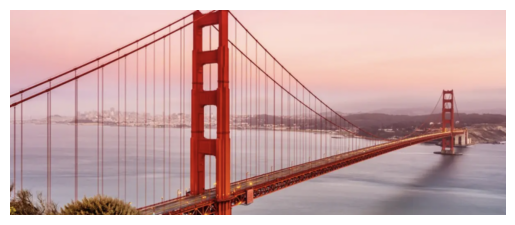

The weather in San Francisco is known for being cool and foggy, with a Mediterranean climate characterized by mild winters and cool summers. The city's proximity to the Pacific Ocean and the Golden Gate Strait creates a microclimate that keeps temperatures relatively consistent throughout the year. Here's a breakdown of the typical weather patterns in San Francisco:

**Seasons:**

* **Winter (December to February):** Cool and wet, with average highs around 58°F (14°C) and lows around 45°F (7°C). Expect occasional rain showers and fog.
* **Spring (March to May):** Mild and sunny, with average highs around 64°F (18°C) and lows around 50°F (10°C). This is a great time to visit, with fewer crowds and pleasant weather.
* **Summer (June to August):** Cool and foggy, with average highs around 67°F (19°C) and lows around 54°F (12°C). Summer is the peak tourist season, but be prepared for chilly mornings and evenings.
* **Fall (September to November):** Warm and sunny, with average highs around

In [51]:
imgurl = "https://raw.githubusercontent.com/jeffxtang/llama-stack-apps/refs/heads/main/examples/golden_gate.png"

result = llama32pi("What's the weather like here?", imgurl)
print(result)

In [52]:
messages = [
    {
      "role": "system",
      "content":  f"""
Environment: ipython
Tools: brave_search, wolfram_alpha
Cutting Knowledge Date: December 2023
Today Date: {formatted_date}
"""
      },
    {
      "role": "user",
      "content": f"What is the current weather in the location mentioned in the text below: {result}"
    }
  ]

print(llama32(messages))

<|python_tag|>brave_search.call(query="current weather in San Francisco")


Now we can prompt Llama 3.2 for possible tool calling info, as shown in the brave_search built-in tool section above.

# RAG in Llama 3.2

Llama 3.2 has the knowledge cutoff date as December 2023. To ask Llama 3.2 to answer questions about internal data or data generated after December 2023, one can integrate RAG (Retrieval Augmented Generation) with Llama 3.2.

## Installing LangChain, FAISS and Groq packages

In [53]:
!pip install -q langchain langchain-community sentence-transformers faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.7/407.7 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.6 MB/s eta 0:00:00


We'll use LangChain's Groq integration to create a Llama 3.1 8B instance.

In [54]:
!pip install -qU langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 3.3 MB/s eta 0:00:00


In [55]:
from langchain_groq import ChatGroq
import os
from google.colab import userdata

os.environ['GROQ_API_KEY'] = userdata.get('GROQ_API_KEY')
llm = ChatGroq(model="llama-3.1-8b-instant")

## Load and process web documents

Next we'll load a web document (Huggingface's blog on Llama 3.2) and create a vector store storing the info in it. This may take about 1 min on a CPU and 26s on a T4 GPU.

In [56]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
import bs4

# load the document from some web urls - the Huggingface blog on Llama 3.2 and the Sequoiacap's Generative AI Act III
loader = WebBaseLoader(["https://huggingface.co/blog/llama32", "https://www.sequoiacap.com/article/generative-ais-act-o1/"])

documents = loader.load()

# split the document into chunks with a specified chunk size
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
all_splits = text_splitter.split_documents(documents)

# store the splits into a vector store with a specific embedding model
vectorstore = FAISS.from_documents(all_splits, HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))

<ipython-input-56-faefde81f8e3>:17: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  vectorstore = FAISS.from_documents(all_splits, HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Create RAG chain with appropriate prompt

In [57]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise."
    "\n\n"
    "{context}"
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

question_answer_chain = create_stuff_documents_chain(llm, prompt)

In [58]:
retriever = vectorstore.as_retriever()
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

## Ask questions about the documents

In [60]:
response = rag_chain.invoke({"input": "what can llama 3.2 be used to develop for?"})
response["answer"]

"Llama 3.2 can be used to develop a variety of applications, including those that run directly on a device's CPU/GPU/browser using open-source libraries like Llama.cpp & Llama-cpp-python. It can also be used to develop small text-only language models for on-device use cases."

In [61]:
response = rag_chain.invoke({"input": "tell me about multimodal capabilities of Llama 3?"})
response["answer"]

"I don't know. Llama 3.2 Vision is mentioned in the context, but I don't have information about Llama 3 in general."

In [62]:
response = rag_chain.invoke({"input": "What should the developer universe worry about?"})
response["answer"]

'The developer universe should worry about being disrupted by new, competing technologies in the AI stack, especially in the infrastructure layer where NVIDIA and hyperscalers already have a significant presence. This could lead to challenging competition.'

## Ask follow up question

To ask follow up questions, we'll use LangChain's create_history_aware_retriever and different system prompts.

In [63]:
from langchain.chains import create_history_aware_retriever
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

contextualize_q_system_prompt = """Given a chat history and the latest user question \
which might reference context in the chat history, formulate a standalone question \
which can be understood without the chat history. Do NOT answer the question, \
just reformulate it if needed and otherwise return it as is."""
contextualize_q_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", contextualize_q_system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)
history_aware_retriever = create_history_aware_retriever(
    llm, retriever, contextualize_q_prompt
)

In [64]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain

qa_system_prompt = """You are an assistant for question-answering tasks. \
Use the following pieces of retrieved context to answer the question. \
If you don't know the answer, just say that you don't know. \
Use three sentences maximum and keep the answer concise.\

{context}"""
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", qa_system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)


question_answer_chain = create_stuff_documents_chain(llm, qa_prompt)

rag_chain = create_retrieval_chain(history_aware_retriever, question_answer_chain)

After a history aware retriever RAG chain is created, we'll populate the chat history and pass it along with a follow up question to Llama.

In [65]:
from langchain_core.messages import HumanMessage

chat_history = []
chat_history.extend([HumanMessage(content="What should the developer universe worry about?"), response["answer"]])

second_question = "Tell me more."
response = rag_chain.invoke({"input": second_question, "chat_history": chat_history})

response["answer"]

'The developer universe also has to worry about competing on the model layer, where companies like OpenAI and Meta (Mark Zuckerberg) have strong positions, making it difficult to innovate and gain traction. This leaves the app layer as a relatively more accessible space for new entrants to compete and innovate.'

## Load and process PDF

Now let's see how to load a PDF file and ask question about it.

In [66]:
!pip install -q pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.5/294.5 kB 4.4 MB/s eta 0:00:00


In [73]:
# The Llama 3 Herd of Models paper
!wget https://arxiv.org/pdf/2407.21783

--2024-10-21 06:46:09--  https://arxiv.org/pdf/2407.21783
Resolving arxiv.org (arxiv.org)... 151.101.67.42, 151.101.131.42, 151.101.3.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.67.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9832488 (9.4M) [application/pdf]
Saving to: ‘2407.21783.1’

2407.21783.1        100%[===================>]   9.38M  23.1MB/s    in 0.4s    

2024-10-21 06:46:10 (23.1 MB/s) - ‘2407.21783.1’ saved [9832488/9832488]



In [68]:
# loading a 92-page PDF (the Llama 3 paper) and generating a vector store using FAISS CPU may take 10 minutes but only 20s or so on T4 GPU

from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("/content/2407.21783")
docs = loader.load()
print(docs[0], len(docs))
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
all_pdf_splits = text_splitter.split_documents(docs)
vectorstore_pdf = FAISS.from_documents(all_pdf_splits, HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))

page_content='The Llama 3 Herd of Models
Llama Team, AI @ Meta1
1A detailed contributor list can be found in the appendix of this paper.
Modern artificial intelligence (AI) systems are powered by foundation models. This paper presents a
new set of foundation models, called Llama 3. It is a herd of language models that natively support
multilinguality, coding, reasoning, and tool usage. Our largest model is a dense Transformer with
405B parameters and a context window of up to 128K tokens. This paper presents an extensive
empirical evaluation of Llama 3. We find that Llama 3 delivers comparable quality to leading language
models such as GPT-4 on a plethora of tasks. We publicly release Llama 3, including pre-trained and
post-trained versions of the 405B parameter language model and our Llama Guard 3 model for input
and output safety. The paper also presents the results of experiments in which we integrate image,
video, and speech capabilities into Llama 3 via a compositional approach. W

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


The same prompt and question answer chain are used for PDF as for web documents, but we create a new RAG chain using the new vector store for the PDF document.

In [69]:
# from langchain.chains import create_retrieval_chain
# from langchain.chains.combine_documents import create_stuff_documents_chain
# from langchain_core.prompts import ChatPromptTemplate

# system_prompt = (
#     "You are an assistant for question-answering tasks. "
#     "Use the following pieces of retrieved context to answer "
#     "the question. If you don't know the answer, say that you "
#     "don't know. Use three sentences maximum and keep the "
#     "answer concise."
#     "\n\n"
#     "{context}"
# )

# prompt = ChatPromptTemplate.from_messages(
#     [
#         ("system", system_prompt),
#         ("human", "{input}"),
#     ]
# )

# question_answer_chain = create_stuff_documents_chain(llm, prompt)

retriever = vectorstore_pdf.as_retriever()
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

## Ask questions about the PDF doc

In [71]:
response = rag_chain.invoke({"input": "how long is the context window in Llama 3?"})
response["answer"]

KeyError: "Input to ChatPromptTemplate is missing variables {'chat_history'}.  Expected: ['chat_history', 'context', 'input'] Received: ['input', 'context']\nNote: if you intended {chat_history} to be part of the string and not a variable, please escape it with double curly braces like: '{{chat_history}}'.\nFor troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_PROMPT_INPUT"

In [72]:
response = rag_chain.invoke({"input": "What's new in Llama 3?"})
response["answer"]

KeyError: "Input to ChatPromptTemplate is missing variables {'chat_history'}.  Expected: ['chat_history', 'context', 'input'] Received: ['input', 'context']\nNote: if you intended {chat_history} to be part of the string and not a variable, please escape it with double curly braces like: '{{chat_history}}'.\nFor troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_PROMPT_INPUT"